In [2]:
from datetime import datetime, timedelta

import pandas as pd
import glob
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.dates import DateFormatter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

In [3]:
# Find criteria to pick channels
# Reading the freq.csv file that will help in building
# a unique list of channel data

channeldata = pd.read_csv("C:/Users/jainsac/Downloads/MRP/Assignment 2/freq.csv", sep = '\t')

In [4]:
channeldata.head(3)

,Unnamed: 0,channel_id,freq,sd
0,0,52338,0.000004,NaN
1,1,53820,0.000004,NaN
2,2,53896,0.000004,NaN


In [5]:
print(len(channeldata))

7814


In [6]:
# finding the number of unique channels 
print(len(channeldata.freq.unique()))

3914


In [7]:
channeldata.freq.unique()

array([3.95392882e-06, 7.90785764e-06, 1.18617865e-05, ...,
       9.99996046e-01, 1.00000000e+00, 1.00000395e+00])

In [8]:
# channel data dataframe now contains no duplicates
channeldata = channeldata.drop_duplicates('freq')

In [9]:
# observing the data
channeldata.head(5)

,Unnamed: 0,channel_id,freq,sd
0,0,52338,0.000004,NaN
329,329,55525,0.000008,4.454773
570,570,52179,0.000012,3.970306
715,715,53706,0.000016,3.793415
834,834,53674,0.000020,7.798590


In [10]:
# doing some exploration on the channeldata dataframe
print(len(channeldata.loc[channeldata['freq'] <0.9]))

3702


In [11]:
# randomly pick a few samples and 
# create a channel data list
from random import sample
channeldata = channeldata.iloc[sample(range(len(channeldata)), 2), :]

In [12]:
print(channeldata)

      Unnamed: 0  channel_id      freq         sd
7210        7210       55858  0.789975   1.924377
6760        6760       33350  0.352615  20.245186


In [13]:
# from the dataframe, grab the channels and
# bundle them up in a channel list. 
channel_list = channeldata['channel_id'].tolist()

In [14]:
# print the channel list
channel_list

[55858, 33350]

In [15]:
year = 2016
month = 10
RootFilePath= "C:/Users/jainsac/Downloads/MRP/Assignment 2/"

# for the purpose of testing
# setting the channel list to 
# 9000. Once testing is completed, this
# value can again be taken from the list
# created above
channel_list = [9000]#[54454]

In [4]:
path = r'C:/Users/jainsac/Downloads/MRP/Assignment 2/'

# Reading all the channel data files and loading
# them in channelData dataframe. channelData data
# frame contains following attributes: scan_time, 
# channel_id, power_dbm
allFiles = glob.glob(path+'/channels*.p')
channelData = pd.concat((pickle.load(open(f, "rb")) for f in allFiles))

# Reading the timerange file and loading
# them in timeRange data frame
ranges = glob.glob(path+'/time*.p')
timeRange = pd.concat((pickle.load(open(f, "rb")) for f in ranges))

In [17]:
channelData.tail(10)

,scan_time,channel_id,power_dbm
113230,2016-10-04 14:59:32.570,6720,-57.2
113231,2016-10-04 14:59:32.850,6720,-57.2
113232,2016-10-04 14:59:34.988,6720,-57.2
113233,2016-10-04 14:59:35.268,6720,-57.2
113234,2016-10-04 14:59:35.533,6720,-57.3
113235,2016-10-04 14:59:35.798,6720,-57.3
113236,2016-10-04 14:59:36.064,6720,-57.3
113237,2016-10-04 14:59:36.329,6720,-57.3
113238,2016-10-04 14:59:36.609,6720,-57.4
113239,2016-10-04 14:59:37.951,6720,-90.2


In [18]:
channelData.shape[0]

10024498

In [19]:
channelData.groupby('channel_id').count()

,scan_time,power_dbm
channel_id,,
4630,1559954,1559954
6710,79438,79438
6720,241544,241544
7280,1593909,1593909
8650,1960525,1960525
9000,1458870,1458870
10870,1042349,1042349
14850,918476,918476
14990,1169433,1169433


In [20]:
# exploring the recently
# created channelData dataframe
channelData.head()

,scan_time,channel_id,power_dbm
0,2016-10-16 14:34:00.698,9000,-85.1
1,2016-10-16 14:34:00.963,9000,-90.4
2,2016-10-16 14:34:05.923,9000,-87.5
3,2016-10-16 14:34:09.246,9000,-87.3
4,2016-10-16 14:34:10.618,9000,-89.1


In [21]:
timeRange.head()

,scan_time
0,2016-10-01 05:01:03.220
1,2016-10-01 05:01:03.517
2,2016-10-01 05:01:03.781
3,2016-10-01 05:01:04.063
4,2016-10-01 05:01:04.328


In [22]:
# total number of records in the dataframe. 
# Exploratory
len(timeRange)

9756914

In [23]:
# for testing purposes, setting the daterange between OCt 6th and Oct 7th. Also,
# the time interval is set to 60min. This can be modified to generate tome for 
# different resolution

# iterating for each channel in channel list
for ch in channel_list:
    dts = [dt.strftime('%Y-%m-%d %H:%M:%S.%f ') for dt in 
           datetime_range(datetime(year, month, 6, 0, 0, 0, 0), datetime(year, month, 9, 0, 0, 0, 0), 
                          timedelta(minutes=60))]
    i = 0
    j = 1
    #print(len(dts))
    print(ch)
    # reading available layer 3 data from OctDataSmall.csv file
    data = pd.read_csv(RootFilePath+"OctDataSmall.csv", header = None)
    data.columns = ['StartTime', 'EndTime', 'Channel', 'Power_dbm','SNR', 'Occupancy']

    # subsetting the data dataframe to pick data where 
    # channel matches the subset channel for the month of October
    
    # For testing purpose, limiting the data to three days between Oct 6th and Oct 9th
    # StartTime and EndTime condition can be removed once testing is completed 
    #layer3dataPerChannel = data[(data.Channel == ch)][['StartTime', 'EndTime', 'Channel', 'Occupancy']] # select all rows for a given channel
    layer3dataPerChannel = data[(data.Channel == ch) & 
     (data.StartTime >= '2016-10-06 00:00:00.0000000') & 
     (data.EndTime <= '2016-10-09 00:00:00.0000000')][['StartTime', 'EndTime', 'Channel', 'Occupancy']] # select all rows for a given channel
    
    # Prints total number of data rows
    print(layer3dataPerChannel.shape[0])
    
    # print top 5 data from dataframe
    print(layer3dataPerChannel.head())

9000
53
                         StartTime                      EndTime  Channel  \
1876   2016-10-06 00:00:00.1640000  2016-10-06 01:00:00.0000000     9000   
5362   2016-10-06 01:00:00.0110000  2016-10-06 02:00:00.0000000     9000   
8616   2016-10-06 02:00:00.2320000  2016-10-06 03:00:00.0000000     9000   
12763  2016-10-06 03:00:00.1740000  2016-10-06 04:00:00.0000000     9000   
17922  2016-10-06 04:00:00.0510000  2016-10-06 04:59:19.1970000     9000   

       Occupancy  
1876   25.880164  
5362   25.000000  
8616   26.267144  
12763  25.724287  
17922  24.817133  


In [70]:
data.head(5)

,StartTime,EndTime,Channel,Power_dbm,SNR,Occupancy
0,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,56302,-77.940605,26.758839,100.0
1,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,56303,-83.293709,21.397917,100.0
2,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,56304,-63.193748,41.497952,100.0
3,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,56305,-31.322813,73.445999,100.0
4,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,56306,-64.096245,41.568588,100.0


In [24]:
# Printing the time intervals
dts

['2016-10-06 00:00:00.000000 ',
 '2016-10-06 01:00:00.000000 ',
 '2016-10-06 02:00:00.000000 ',
 '2016-10-06 03:00:00.000000 ',
 '2016-10-06 04:00:00.000000 ',
 '2016-10-06 05:00:00.000000 ',
 '2016-10-06 06:00:00.000000 ',
 '2016-10-06 07:00:00.000000 ',
 '2016-10-06 08:00:00.000000 ',
 '2016-10-06 09:00:00.000000 ',
 '2016-10-06 10:00:00.000000 ',
 '2016-10-06 11:00:00.000000 ',
 '2016-10-06 12:00:00.000000 ',
 '2016-10-06 13:00:00.000000 ',
 '2016-10-06 14:00:00.000000 ',
 '2016-10-06 15:00:00.000000 ',
 '2016-10-06 16:00:00.000000 ',
 '2016-10-06 17:00:00.000000 ',
 '2016-10-06 18:00:00.000000 ',
 '2016-10-06 19:00:00.000000 ',
 '2016-10-06 20:00:00.000000 ',
 '2016-10-06 21:00:00.000000 ',
 '2016-10-06 22:00:00.000000 ',
 '2016-10-06 23:00:00.000000 ',
 '2016-10-07 00:00:00.000000 ',
 '2016-10-07 01:00:00.000000 ',
 '2016-10-07 02:00:00.000000 ',
 '2016-10-07 03:00:00.000000 ',
 '2016-10-07 04:00:00.000000 ',
 '2016-10-07 05:00:00.000000 ',
 '2016-10-07 06:00:00.000000 ',
 '2016-1

In [25]:
# since the current time period is between
# oct 6th and oct 9th, length is 24 X 3 = 72
len(dts)

72

In [26]:
layer3dataPerChannel.head(5)

,StartTime,EndTime,Channel,Occupancy
1876,2016-10-06 00:00:00.1640000,2016-10-06 01:00:00.0000000,9000,25.880164
5362,2016-10-06 01:00:00.0110000,2016-10-06 02:00:00.0000000,9000,25.000000
8616,2016-10-06 02:00:00.2320000,2016-10-06 03:00:00.0000000,9000,26.267144
12763,2016-10-06 03:00:00.1740000,2016-10-06 04:00:00.0000000,9000,25.724287
17922,2016-10-06 04:00:00.0510000,2016-10-06 04:59:19.1970000,9000,24.817133


In [27]:
#chanMask[0]

In [28]:
#chanMask.head()

In [29]:
#timeMask = (channelData.scan_time >= startTime) & (channelData.scan_time <= endTime)

In [30]:
#timeMask.head()

In [31]:
#subset = channelData.loc[chanMask & timeMask].reset_index(drop = True)

In [32]:
#subset.head()

In [33]:
# code below takes the subset of the data from channel and
# time range and aggregate the value of occupancy for each time interval
# in the end list of occupancy and start time values are saved into temp_df dataframe

i = 0
j = 1
a_list = []
b_list = []
while (i < len(dts) and j < len(dts)):
    channel = ch
    startTime = dts[i]
    endTime = dts[j]
    print(startTime)
    print(endTime)
    chanMask = channelData.channel_id == channel
    print(chanMask.head())
    timeMask = (channelData.scan_time > startTime) & (channelData.scan_time <= endTime)
    print(timeMask.head())
    subset = channelData.loc[chanMask & timeMask].reset_index(drop = True)
    print(subset.head())
    print(len(subset))

    timeMask2 = (timeRange.scan_time > startTime) & (timeRange.scan_time <= endTime)
    subTimeRange = timeRange.loc[timeMask2].reset_index(drop = True)
    print(len(subTimeRange))
    
    if (len(subset) and len(subTimeRange)) > 0:
        merged = pd.merge(left = subTimeRange, right = subset, how = 'left')
        merged = merged.fillna(value = {'channel_id': channel})
        merged['isEmpty'] = np.where(pd.isnull(merged.power_dbm), 1, 0)
        OccPercent = 1-sum(merged.isEmpty)/merged.shape[0]
        print(OccPercent)
        a_list.append(startTime)
        b_list.append(OccPercent*100)
    i = i+1
    j = j+1
    
temp_df = pd.DataFrame({'Start_Time': a_list, 'OccupancyPer': b_list}) 

2016-10-06 00:00:00.000000 
2016-10-06 01:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-06 00:00:00.164        9000      -89.6
1 2016-10-06 00:00:04.721        9000      -87.8
2 2016-10-06 00:00:04.986        9000      -87.6
3 2016-10-06 00:00:05.797        9000      -90.7
4 2016-10-06 00:00:06.326        9000      -90.5
3477
13435
0.25880163751395613
2016-10-06 01:00:00.000000 
2016-10-06 02:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-06 01:31:15.385        9000      -87.8
1 2016-10-06 01:31:15.650        9000      -87.2
2 2016-10-06 01:31:15.915        9000      -90.7
3 2016-10-06 01:31:16.726        9000  

2016-10-06 16:00:00.000000 
2016-10-06 17:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-06 16:30:54.712        9000      -87.6
1 2016-10-06 16:30:57.738        9000      -87.7
2 2016-10-06 16:31:06.552        9000      -88.1
3 2016-10-06 16:31:06.832        9000      -88.7
4 2016-10-06 16:31:07.660        9000      -88.9
2695
13079
0.20605550883095036
2016-10-06 17:00:00.000000 
2016-10-06 18:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-06 17:30:07.213        9000      -90.6
1 2016-10-06 17:30:07.493        9000      -89.7
2 2016-10-06 17:30:08.585        9000      -90.0
3 2016-10-06 17:30:09.146        9000  

0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-07 08:30:40.734        9000      -87.3
1 2016-10-07 08:30:41.264        9000      -89.8
2 2016-10-07 08:30:41.529        9000      -90.2
3 2016-10-07 08:30:41.810        9000      -90.3
4 2016-10-07 08:30:42.871        9000      -87.1
3258
13424
0.24269964243146602
2016-10-07 09:00:00.000000 
2016-10-07 10:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-07 09:00:03.023        9000      -89.4
1 2016-10-07 09:00:03.834        9000      -87.4
2 2016-10-07 09:00:04.099        9000      -86.8
3 2016-10-07 09:00:05.986        9000      -90.5
4 2016-10-07 09:00:06.516        9000      -88

0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-07 23:16:08.296        9000      -88.8
1 2016-10-07 23:16:11.043        9000      -89.7
2 2016-10-07 23:16:11.589        9000      -89.5
3 2016-10-07 23:16:14.054        9000      -89.3
4 2016-10-07 23:16:16.799        9000      -89.1
2930
13133
0.2231021091905886
2016-10-08 00:00:00.000000 
2016-10-08 01:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-08 00:32:12.022        9000      -89.8
1 2016-10-08 00:32:12.568        9000      -89.4
2 2016-10-08 00:32:12.833        9000      -90.8
3 2016-10-08 00:32:13.114        9000      -89.8
4 2016-10-08 00:32:14.207        9000      -88.0
3162
13144
0.24056603773584906
2016-10-08 01:00:00.000000 
2016-10-08 02:00:00

13410
0.23012677106636836
2016-10-08 15:00:00.000000 
2016-10-08 16:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-08 15:00:01.641        9000      -87.1
1 2016-10-08 15:00:02.172        9000      -88.8
2 2016-10-08 15:00:02.982        9000      -88.6
3 2016-10-08 15:00:05.120        9000      -89.3
4 2016-10-08 15:00:05.930        9000      -89.6
2785
13417
0.20757248267123796
2016-10-08 16:00:00.000000 
2016-10-08 17:00:00.000000 
0    True
1    True
2    True
3    True
4    True
Name: channel_id, dtype: bool
0    False
1    False
2    False
3    False
4    False
Name: scan_time, dtype: bool
                scan_time  channel_id  power_dbm
0 2016-10-08 16:32:57.933        9000      -90.0
1 2016-10-08 16:32:58.214        9000      -88.0
2 2016-10-08 16:33:01.958        9000      -87.2
3 2016-10-08 

In [34]:
len(temp_df)

71

In [35]:
temp_df

,OccupancyPer,Start_Time
0,25.880164,2016-10-06 00:00:00.000000
1,25.000000,2016-10-06 01:00:00.000000
2,26.267144,2016-10-06 02:00:00.000000
3,25.724287,2016-10-06 03:00:00.000000
4,24.817133,2016-10-06 04:00:00.000000
5,27.662160,2016-10-06 05:00:00.000000
6,27.661477,2016-10-06 06:00:00.000000
7,26.457867,2016-10-06 07:00:00.000000
8,27.734672,2016-10-06 08:00:00.000000
9,26.532166,2016-10-06 09:00:00.000000


In [36]:
# Layer3 data coming from SmallOCt.csv had 53 records.
# Calculation of data for occupancy percent temp_df have more rows
len(layer3dataPerChannel)

53

In [37]:
# converting dataframe column to datetime
layer3dataPerChannel['StartTime'] = pd.to_datetime(layer3dataPerChannel['StartTime'])
temp_df['Start_Time'] = pd.to_datetime(temp_df['Start_Time'])

In [38]:
temp_df.head()

,OccupancyPer,Start_Time
0,25.880164,2016-10-06 00:00:00
1,25.000000,2016-10-06 01:00:00
2,26.267144,2016-10-06 02:00:00
3,25.724287,2016-10-06 03:00:00
4,24.817133,2016-10-06 04:00:00


In [39]:
layer3dataPerChannel = layer3dataPerChannel.set_index("StartTime")

In [40]:
len(layer3dataPerChannel)

53

In [41]:
temp_df = temp_df.set_index("Start_Time", drop=False)

In [42]:
len(temp_df)

71

In [43]:
layer3dataPerChannel.head(5)

,EndTime,Channel,Occupancy
StartTime,,,
2016-10-06 00:00:00.164,2016-10-06 01:00:00.0000000,9000,25.880164
2016-10-06 01:00:00.011,2016-10-06 02:00:00.0000000,9000,25.000000
2016-10-06 02:00:00.232,2016-10-06 03:00:00.0000000,9000,26.267144
2016-10-06 03:00:00.174,2016-10-06 04:00:00.0000000,9000,25.724287
2016-10-06 04:00:00.051,2016-10-06 04:59:19.1970000,9000,24.817133


In [44]:
temp_df.head(5)

,OccupancyPer,Start_Time
Start_Time,,
2016-10-06 00:00:00,25.880164,2016-10-06 00:00:00
2016-10-06 01:00:00,25.000000,2016-10-06 01:00:00
2016-10-06 02:00:00,26.267144,2016-10-06 02:00:00
2016-10-06 03:00:00,25.724287,2016-10-06 03:00:00
2016-10-06 04:00:00,24.817133,2016-10-06 04:00:00


In [45]:
temp_df = temp_df.reindex(layer3dataPerChannel.index, method='nearest')

In [46]:
len(temp_df)

53

In [47]:
temp_df.head(5)

,OccupancyPer,Start_Time
StartTime,,
2016-10-06 00:00:00.164,25.880164,2016-10-06 00:00:00
2016-10-06 01:00:00.011,25.000000,2016-10-06 01:00:00
2016-10-06 02:00:00.232,26.267144,2016-10-06 02:00:00
2016-10-06 03:00:00.174,25.724287,2016-10-06 03:00:00
2016-10-06 04:00:00.051,24.817133,2016-10-06 04:00:00


In [48]:
layer3dataPerChannel = layer3dataPerChannel.join(temp_df)

In [49]:
len(layer3dataPerChannel)

53

In [50]:
len(temp_df)

53

In [51]:
layer3dataPerChannel.head(5)

,EndTime,Channel,Occupancy,OccupancyPer,Start_Time
StartTime,,,,,
2016-10-06 00:00:00.164,2016-10-06 01:00:00.0000000,9000,25.880164,25.880164,2016-10-06 00:00:00
2016-10-06 01:00:00.011,2016-10-06 02:00:00.0000000,9000,25.000000,25.000000,2016-10-06 01:00:00
2016-10-06 02:00:00.232,2016-10-06 03:00:00.0000000,9000,26.267144,26.267144,2016-10-06 02:00:00
2016-10-06 03:00:00.174,2016-10-06 04:00:00.0000000,9000,25.724287,25.724287,2016-10-06 03:00:00
2016-10-06 04:00:00.051,2016-10-06 04:59:19.1970000,9000,24.817133,24.817133,2016-10-06 04:00:00


In [52]:
# calculating the difference between layer3 occupancy and calculated occupancy
layer3dataPerChannel['diff'] = layer3dataPerChannel.Occupancy - layer3dataPerChannel.OccupancyPer

In [53]:
layer3dataPerChannel

,EndTime,Channel,Occupancy,OccupancyPer,Start_Time,diff
StartTime,,,,,,
2016-10-06 00:00:00.164,2016-10-06 01:00:00.0000000,9000,25.880164,25.880164,2016-10-06 00:00:00,-7.105427e-15
2016-10-06 01:00:00.011,2016-10-06 02:00:00.0000000,9000,25.000000,25.000000,2016-10-06 01:00:00,0.000000e+00
2016-10-06 02:00:00.232,2016-10-06 03:00:00.0000000,9000,26.267144,26.267144,2016-10-06 02:00:00,7.105427e-15
2016-10-06 03:00:00.174,2016-10-06 04:00:00.0000000,9000,25.724287,25.724287,2016-10-06 03:00:00,-7.105427e-15
2016-10-06 04:00:00.051,2016-10-06 04:59:19.1970000,9000,24.817133,24.817133,2016-10-06 04:00:00,1.065814e-14
2016-10-06 05:01:03.592,2016-10-06 06:00:00.0000000,9000,27.660059,27.662160,2016-10-06 05:00:00,-2.100870e-03
2016-10-06 06:00:00.263,2016-10-06 07:00:00.0000000,9000,27.661477,27.661477,2016-10-06 06:00:00,3.552714e-15
2016-10-06 07:00:00.249,2016-10-06 08:00:00.0000000,9000,26.457867,26.457867,2016-10-06 07:00:00,-3.552714e-15
2016-10-06 08:00:00.049,2016-10-06 09:00:00.0000000,9000,27.734672,27.734672,2016-10-06 08:00:00,-3.552714e-15


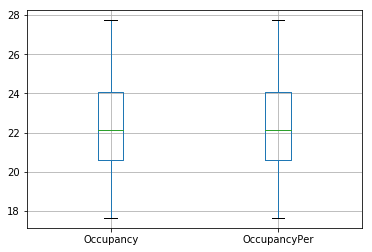

In [54]:
# generating a box plot to compare two occupancy percentages
layer3dataPerChannel.boxplot(column=['Occupancy', 'OccupancyPer']);
plt.savefig(fname = RootFilePath)

In [55]:
# Printing the dataframe
layer3dataPerChannel.head()

,EndTime,Channel,Occupancy,OccupancyPer,Start_Time,diff
StartTime,,,,,,
2016-10-06 00:00:00.164,2016-10-06 01:00:00.0000000,9000,25.880164,25.880164,2016-10-06 00:00:00,-7.105427e-15
2016-10-06 01:00:00.011,2016-10-06 02:00:00.0000000,9000,25.000000,25.000000,2016-10-06 01:00:00,0.000000e+00
2016-10-06 02:00:00.232,2016-10-06 03:00:00.0000000,9000,26.267144,26.267144,2016-10-06 02:00:00,7.105427e-15
2016-10-06 03:00:00.174,2016-10-06 04:00:00.0000000,9000,25.724287,25.724287,2016-10-06 03:00:00,-7.105427e-15
2016-10-06 04:00:00.051,2016-10-06 04:59:19.1970000,9000,24.817133,24.817133,2016-10-06 04:00:00,1.065814e-14


In [56]:
# adding a new column to the dataframe which is absolute
# value of the column
layer3dataPerChannel['diff_abs'] = layer3dataPerChannel['diff'].abs()

In [104]:
# create a list that contains values from 0.1 to 1e-15
diffList = [0.1]
d = 0.1
n = 1
while n < 15:
    d = d/10
    diffList.append(d)
    n = n+1

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08, 1.0000000000000003e-09, 1.0000000000000003e-10, 1.0000000000000003e-11, 1.0000000000000002e-12, 1.0000000000000002e-13, 1.0000000000000002e-14, 1e-15]
[0.0, 0.0, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.037735849056603765, 0.09433962264150941, 0.7547169811320755]


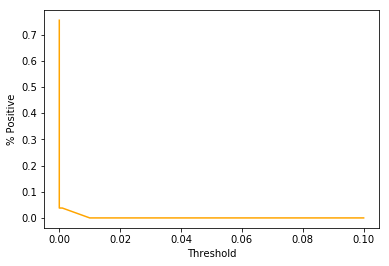

In [112]:
# the logic that will populate the right values in the HitMiss column
# Logic: if diff < value from the diffList then we can say this is a hit (indicated by 1)
# else it's a miss

PercentPositive = []
for j in diffList:
    diffmean = j
    layer3dataPerChannel['HitMiss'] = 0
    for (idx, row) in layer3dataPerChannel.iterrows():
        layer3dataPerChannel.loc[(layer3dataPerChannel['diff_abs'] < diffmean), ['HitMiss']] = 1
    pos = layer3dataPerChannel['HitMiss'].sum()
    PercentPos = (1 - pos/layer3dataPerChannel.shape[0])

    PercentPositive.append(PercentPos)
print(diffList)
print(PercentPositive)
plt.plot(diffList, PercentPositive, color = 'orange')
plt.xlabel('Threshold')
plt.ylabel('% Positive')
plt.show()

# The plot as well as values below indicates that values 0.001 have a constant threshold until it reaches 1e-14

In [68]:
# Finding the RMSE
import numpy as np
from sklearn.metrics import mean_squared_error

# RMSE need to be found out between Occupancy and OccupancyPer columns
rmse = np.sqrt( mean_squared_error( layer3dataPerChannel['Occupancy'], layer3dataPerChannel['OccupancyPer'] ) )

In [69]:
# Printing the value of RMSE
rmse

0.0003714810170243537